<a href="https://colab.research.google.com/github/niteshavagabond/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Nitesh_Verma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank Stock Closing Prediction


## Problem Statement

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

In [82]:
# importing libraries
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
##cv
from sklearn.model_selection import cross_val_score


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = (10,6)
%matplotlib inline


In [3]:
#Import libraries for Regressor
import math
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso


In [4]:
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# loading Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Yes Bank Stock Closing Price Prediction - Nitesh Verma/data_YesBank_StockPrices.csv') 

In [7]:
# looking at first 5 rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [8]:
df[df['Close']==0]

,Date,Open,High,Low,Close


In [9]:
# looking at last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [10]:
df.shape

(185, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [12]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [13]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,Date,object,0,0.0,185,"[Jul-05, Aug-05, Sep-05, Oct-05, Nov-05, Dec-0..."
1,Open,float64,0,0.0,183,"[13.0, 12.58, 13.48, 13.2, 13.35, 13.49, 13.68..."
2,High,float64,0,0.0,184,"[14.0, 14.88, 14.87, 14.47, 13.88, 14.44, 17.1..."
3,Low,float64,0,0.0,183,"[11.25, 12.55, 12.27, 12.4, 12.88, 13.0, 13.58..."
4,Close,float64,0,0.0,185,"[12.46, 13.42, 13.3, 12.99, 13.41, 13.71, 15.3..."


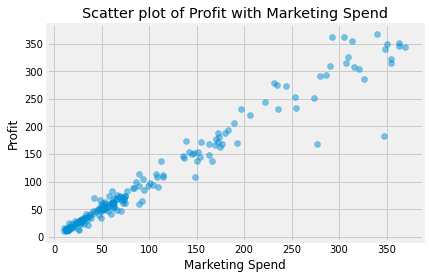

In [14]:
  plt.scatter(df['Open'], df['Close'], alpha=0.5)
  plt.title('Scatter plot of Profit with Marketing Spend')
  plt.xlabel('Marketing Spend')
  plt.ylabel('Profit')
plt.show()

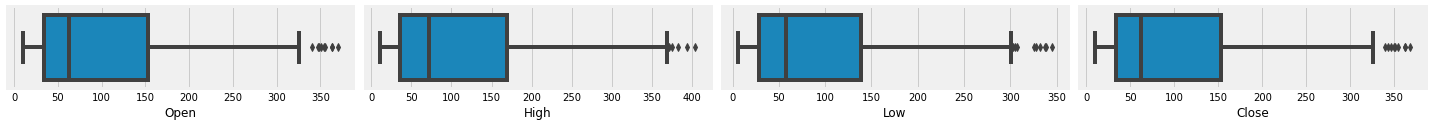

In [15]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

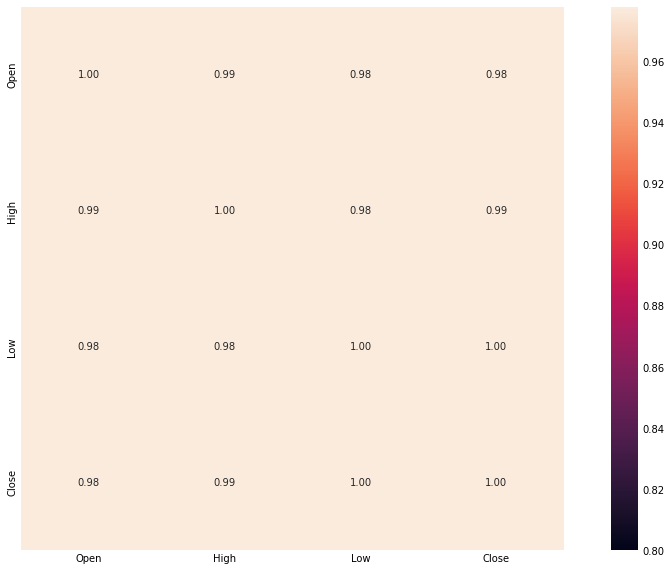

In [16]:
# ploting heat map finding correlation between columns
hdf = df.corr()

plt.subplots(figsize=(15, 10))
sns.heatmap(hdf,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

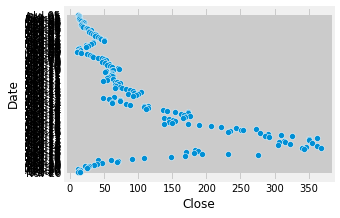

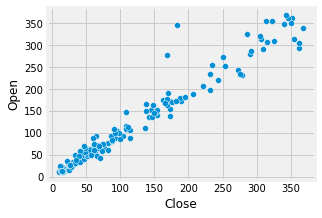

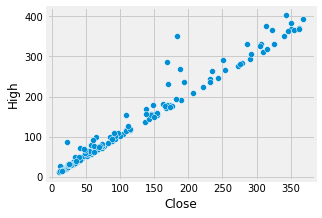

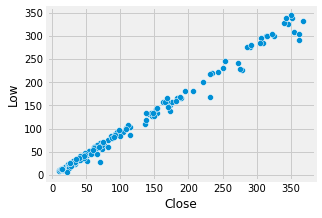

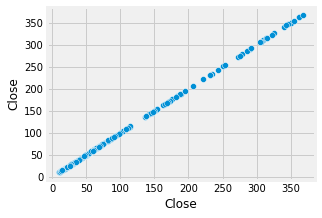

In [17]:
num_it2 =1
for i in df.columns:
  plt.figure(figsize = (30, 30))
  plt.subplot(8,6,num_it2)
  sns.scatterplot(x = 'Close',y =i,data=df)
  num_it2 +=1
plt.show()

In [18]:
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

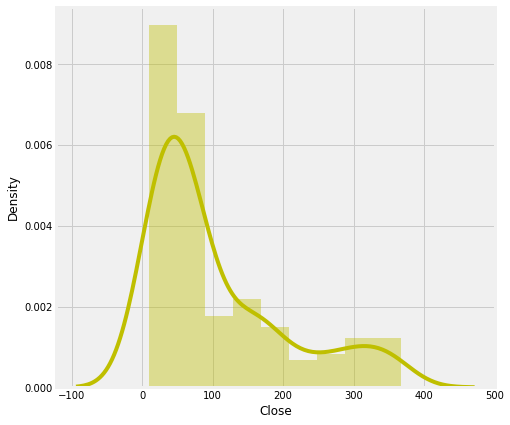

In [19]:
# Dependent variable 'Close'
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="y")

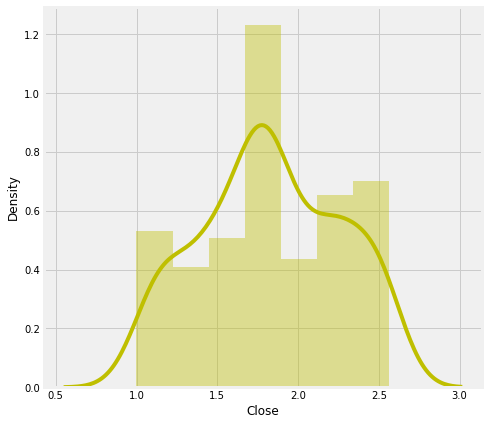

In [20]:
# Dependent variable 'Close'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Close']),color="y")

In [21]:
numeric_features = df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

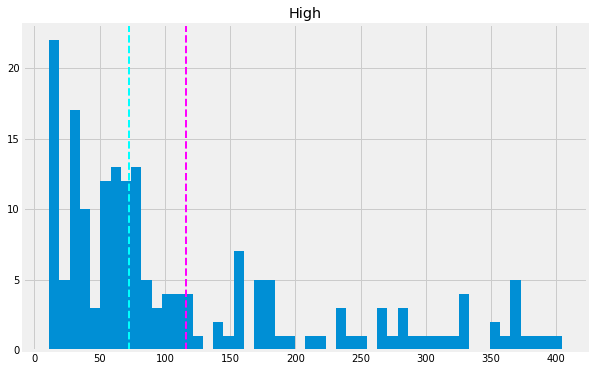

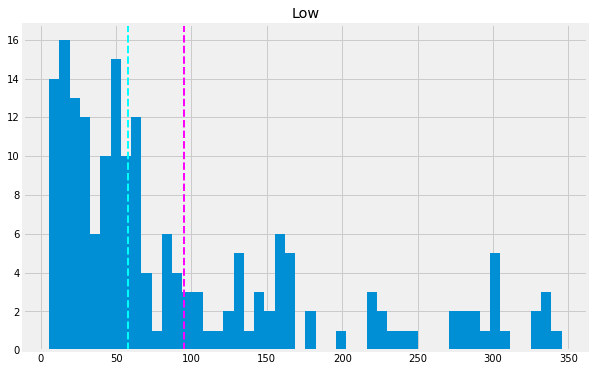

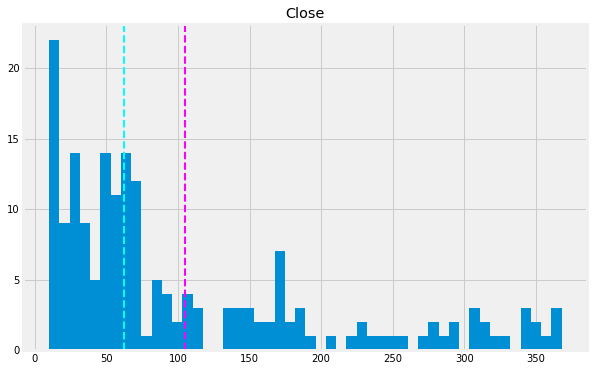

In [22]:
#@title Default title text
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [23]:
df['Date'] =df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [25]:
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)

In [26]:
df.head()

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
 5   Year    185 non-null    int64         
 6   Month   185 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 10.2 KB


In [28]:
df.drop('Date',axis=1,inplace=True)

In [29]:
df.head()

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,7
1,12.58,14.88,12.55,13.42,2005,8
2,13.48,14.87,12.27,13.30,2005,9
3,13.20,14.47,12.40,12.99,2005,10
4,13.35,13.88,12.88,13.41,2005,11


In [30]:
dependent_variable = 'Close'

In [31]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable,'Month','Year'})

In [32]:
# Create the data of independent variables
x = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values

In [33]:
df[independent_variables]

,Low,Open,High
0,11.25,13.00,14.00
1,12.55,12.58,14.88
2,12.27,13.48,14.87
3,12.40,13.20,14.47
4,12.88,13.35,13.88
...,...,...,...
180,11.10,25.60,28.30
181,11.85,12.00,17.16
182,12.75,14.30,15.34
183,12.11,13.30,14.01


In [34]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [35]:
x_train[0:10]

array([[134.  , 142.08, 155.  ],
       [ 16.02,  16.2 ,  20.95],
       [ 57.71,  92.4 , 100.4 ],
       [ 40.95,  59.5 ,  72.55],
       [  9.94,  10.04,  17.51],
       [ 44.8 ,  49.2 ,  78.94],
       [ 47.3 ,  47.8 ,  52.06],
       [ 35.02,  35.98,  41.04],
       [ 30.24,  49.99,  55.56],
       [ 11.1 ,  25.6 ,  28.3 ]])

In [36]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
x_train[0:10]

array([[0.37784968, 0.37409338, 0.37416306],
       [0.03079865, 0.0174524 , 0.02218721],
       [0.15343433, 0.23334089, 0.23079953],
       [0.10413296, 0.14012919, 0.15767362],
       [0.01291366, 0.        , 0.01315479],
       [0.11545816, 0.11094742, 0.17445188],
       [0.12281218, 0.10698096, 0.10387292],
       [0.08668922, 0.07349275, 0.07493764],
       [0.07262833, 0.11318563, 0.11306289],
       [0.01632593, 0.04408432, 0.04148615]])

In [38]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [39]:
regressor.intercept_

8.457918910825043

In [40]:
regressor.coef_

array([ 344.80781882, -155.44880876,  176.73898094])

In [41]:
y_pred_train = regressor.predict(x_train)

In [42]:
y_train

array([154.57,  20.08,  64.76,  41.45,  15.45,  57.5 ,  50.97,  37.93,
        50.54,  11.95,  85.71,  13.15,  34.55,  28.63, 326.14,  73.46,
       354.45,  25.32,  47.31,  54.5 , 322.25,  12.26, 113.89,  33.51,
       114.33,  59.5 , 346.2 ,  67.83,  97.49, 145.92,  43.48,  92.84,
       108.38, 149.38,  14.37, 100.28,  70.3 ,  13.3 ,  53.83,  74.02,
       188.73,  10.26,  18.03, 104.41,  55.61,  26.85, 108.7 , 176.52,
       136.83,  48.65, 350.  ,  27.95,  40.99, 151.82,  92.2 ,  61.21,
       206.39,  15.03,  61.02,  33.45,  31.93,  65.97,  17.84, 290.56,
        35.98,  14.67, 137.9 ,  28.14,  22.78,  65.99,  82.7 ,  50.57,
        73.74,  54.49,  12.99,  12.42, 181.75,  15.33,  61.98,  62.9 ,
        72.85, 234.28,  16.16, 292.37, 183.45,  18.46,  12.46,  94.5 ,
       188.05,  25.12,  15.62, 168.6 ,  61.59,  22.85,  57.1 ,  62.54,
        13.42, 165.74, 315.05,  12.24,  88.14, 243.44, 169.65,  26.97,
        24.13, 272.56,  53.41, 351.15, 172.91,  31.13,  46.18, 172.5 ,
      

In [43]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [44]:
#Predicted profit on the test data
y_pred

array([ 32.05041945, 141.39404628,  44.6186774 , 142.1847688 ,
        67.10693606,  32.62047222, 232.84048635,  18.11837716,
        15.39523209, 214.31677099, 300.57479208,  87.42383581,
       154.01722588,  59.84864685, 342.68198056, 260.7391185 ,
        74.67777157,  28.85960368, 260.75411505,  51.64750396,
        10.53811057, 118.55620032, 147.10778122,  59.92309426,
       218.04859715,  47.9878126 , 250.16672269,  15.07529924,
       108.6874867 ,  53.2946785 , 368.83014088, 339.95761347,
        73.72840345, 167.96544878,  40.15717944,  48.9966109 ,
       262.36562296])

In [45]:
# Actual profits on test data
y_test

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

In [46]:
mean_squared_error(y_test, y_pred)

77.8729862468524

In [47]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

6.408588459143483

In [48]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

8.824567198840542

In [49]:
r2_score(y_train, y_pred_train)

0.9954546486753905

In [50]:
r2_score(y_test, y_pred)

0.9930815866308079

In [51]:
# r2 = r2_score(10**(y_test), 10**(y_pred))
# print("R2 :" ,r2)
# print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

In [52]:
#Implementing ridge regression model
from sklearn.linear_model import Ridge
ridge= Ridge()

In [53]:
#Fitting the model
ridge.fit(x_train,y_train)

Ridge()

In [54]:
#Score 
ridge.score(x_train, y_train)

0.9828282092458902

In [55]:
#Prediction
y_pred_r = ridge.predict(x_test)

In [56]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_r))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_r)))
print("MAE :",mean_absolute_error(y_test, y_pred_r))
print("R2 :",metrics.r2_score(y_test, y_pred_r))

MSE : 183.26510946377084
RMSE : 13.537544439955528
MAE : 7.717264185154191
R2 : 0.983718310488294


In [57]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 8, 6, 19, 20, 21, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [58]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -54.30297164101364


In [59]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(x_test)

In [60]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",metrics.r2_score(y_test, y_pred_ridge))

MSE : 83.61006196248064
RMSE : 9.14385378068135
MAE : 5.48545774072416
R2 : 0.9925718917642818


The best R^2 score is 81.49% for Ridge regression model


In [61]:
#Applying Lasso Regression model
lasso  = Lasso(alpha=0.010 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [62]:
#Fitting lasso model
lasso.fit(x_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [63]:
# prediction for lasso model
y_pred_l = lasso.predict(x_test)

In [64]:
#performance metrics
print("MSE :",mean_squared_error(y_test, y_pred_l))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_l)))
print("MAE :",mean_absolute_error(y_test, y_pred_l))
print("R2 :",metrics.r2_score(y_test, y_pred_l))

MSE : 84.85710322984383
RMSE : 9.21179153204434
MAE : 5.559581066508854
R2 : 0.9924611017793092


The best R^2 score is 82% for Lasso regression model

In [65]:
from sklearn.model_selection import GridSearchCV
### let's use  Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -57.32860374023426


In [67]:
#prediction
y_pred_lasso = lasso_regressor.predict(x_test)

In [68]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",metrics.r2_score(y_test, y_pred_lasso))

MSE : 78.51666266038124
RMSE : 8.860962851766237
MAE : 5.414352952848678
R2 : 0.9930244009529571


Implementing the best parameters best R^2 score we have 82.00% for lasso regression model


In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rf = RandomForestRegressor()


In [71]:
rf.fit(x,y)

RandomForestRegressor()

In [72]:
y_pred1 = rf.predict(x_test)

In [73]:
y_pred1

array([11.6372, 11.6372, 11.6372, 11.6372, 11.6372, 11.6372, 11.6372,
       11.6372, 11.6372, 11.6372, 11.6372, 11.6372, 11.6372, 11.6372,
       11.6372, 11.6372, 11.6372, 11.6372, 11.6372, 11.6372, 11.6372,
       11.6372, 11.6372, 11.6372, 11.6372, 11.6372, 11.6372, 11.6372,
       11.6372, 11.6372, 11.6372, 11.6372, 11.6372, 11.6372, 11.6372,
       11.6372, 11.6372])

In [74]:
mean_squared_error(y_test, y_pred1)

25866.92031692108

In [75]:
y = mean_squared_error(y_test, y_pred1)

In [76]:
np.sqrt(y)

160.83196298286322

In [77]:
from xgboost import XGBRegressor


In [78]:
xgbr = XGBRegressor(verbosity = 0)
print(xgbr)

XGBRegressor(verbosity=0)


In [79]:
xgbr.fit(x_train, y_train)
score = xgbr.score(x_train, y_train)
print("Training score:", score)

Training score: 0.9994694773614536


In [83]:
cv_score = cross_val_score(xgbr, x_train, y_train, cv=10)

In [84]:
cv_score.mean()

0.9887162904602691

In [85]:
ypred2 = xgbr.predict(x_test)


In [86]:
mse3 = mean_squared_error(y_test, ypred2)


In [ ]:
mse3

In [88]:
rmse3 = np.sqrt(mse3)

In [89]:
rmse3

14.212490905981442

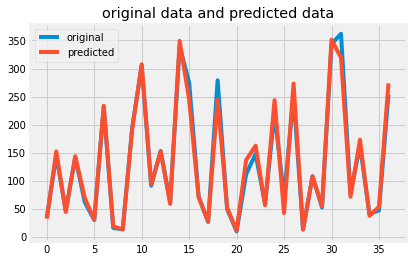

In [90]:
x_ax = range(len(y_test))
plt.plot(x_ax,y_test, label='original')
plt.plot(x_ax,ypred2, label='predicted')
plt.title('original data and predicted data')
plt.legend()
plt.show()